<a href="https://colab.research.google.com/github/Alex-So-Ma/Deep_Learning/blob/main/IAF_Tarea_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tarea 3

## Implemenar una red neuronal utilizando Keras

En esta tarea vas a desarrollar una red neuronal utilizando el conjunto de datos Iris.

En la clase 6 revisamos brevemente este dataset, si aún no tienes claro qué variables son dependientes e independientes puedes revisar la documentación del [dataset](https://archive.ics.uci.edu/ml/datasets/iris).

La finalidad de esta tarea no es que encuentres el mejor modelo (aunque sería bueno que experimentes y encuentres uno bueno) si no que te familiarices con el uso de [Keras](https://keras.io/) y aprendas a utilizar su documentación.

En cada ejercicio agrega las celdas que necesites.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## I. Preparación de los datos

### Ejercicio 1:

1.1 Carga el [conjunto de datos Iris desde sklearn](https://scikit-learn.org/stable/datasets/toy_dataset.html)

1.2 Guarda los rasgos del conjunto de datos en la variable X

1.3 Guarda la salida del conjunto de datos en la variable y

Nota: Asegurate de tener instalada la libreria de sklearn

In [ ]:
from sklearn.datasets import load_iris

In [ ]:
X, y = load_iris(as_frame=True, return_X_y=True)

In [ ]:
X.rename(columns={'sepal length (cm)': 'sepal_length'}, inplace=True)
X.rename(columns={'sepal width (cm)': 'sepal_width'}, inplace=True)
X.rename(columns={'petal length (cm)': 'petal_length'}, inplace=True)
X.rename(columns={'petal width (cm)': 'petal_width'}, inplace=True)
X,y

(     sepal_length  sepal_width  petal_length  petal_width
 0             5.1          3.5           1.4          0.2
 1             4.9          3.0           1.4          0.2
 2             4.7          3.2           1.3          0.2
 3             4.6          3.1           1.5          0.2
 4             5.0          3.6           1.4          0.2
 ..            ...          ...           ...          ...
 145           6.7          3.0           5.2          2.3
 146           6.3          2.5           5.0          1.9
 147           6.5          3.0           5.2          2.0
 148           6.2          3.4           5.4          2.3
 149           5.9          3.0           5.1          1.8
 
 [150 rows x 4 columns],
 0      0
 1      0
 2      0
 3      0
 4      0
       ..
 145    2
 146    2
 147    2
 148    2
 149    2
 Name: target, Length: 150, dtype: int64)

### Ejercicio 2

2.1 Verifica que el tipo de dato de X y y es un arreglo

2.2 Convierte los arreglos a dataframes de pandas y concatenalos para tener un dataframe como el siguiente:

| sepal_length | sepal_width | petal_length | petal_width | target |
| --- | --- | --- | --- | --- |
| 5.1 | 3.5 | 1.4 | 0.2 | 0 |
| 4.9 | 3.0 | 1.4 | 0.2 | 0 |

Hint:

Si no sabes cómo convertir un arreglo en dataframe puedes buscar en google algo así: *how to convert numpy array to dataframe pandas*

Puedes generar un dataframe para las X y uno para las y y despues *juntarlos*. Si no sabes cómo hacer esto, puedes buscar una [cheat sheet de pandas](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf). (En particular puedes utilizar merge sobre el indice de los dataframes creados).

In [ ]:
print(type(X), type(y))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>


In [ ]:
Xy = pd.concat([X, y], axis=1)
Xy

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


### Ejercicio 3

3.1 Los datos estan ordenados de alguna manera?, si es así reordenalos de manera aleatoria.

3.2 Utiliza el método describe para generar una tabla con información estadística

In [ ]:
sXy = Xy.sample(frac=1).reset_index(drop=True)
sXy

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.7,2.5,5.0,2.0,2
1,5.2,4.1,1.5,0.1,0
2,4.6,3.6,1.0,0.2,0
3,6.4,3.1,5.5,1.8,2
4,6.4,2.7,5.3,1.9,2
...,...,...,...,...,...
145,7.2,3.0,5.8,1.6,2
146,5.5,4.2,1.4,0.2,0
147,6.2,3.4,5.4,2.3,2
148,5.0,3.0,1.6,0.2,0


In [ ]:
sXy.describe(include='all')

,sepal_length,sepal_width,petal_length,petal_width,target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


### Ejercicio 4

Realiza los histogramas de cada variable en el dataframe

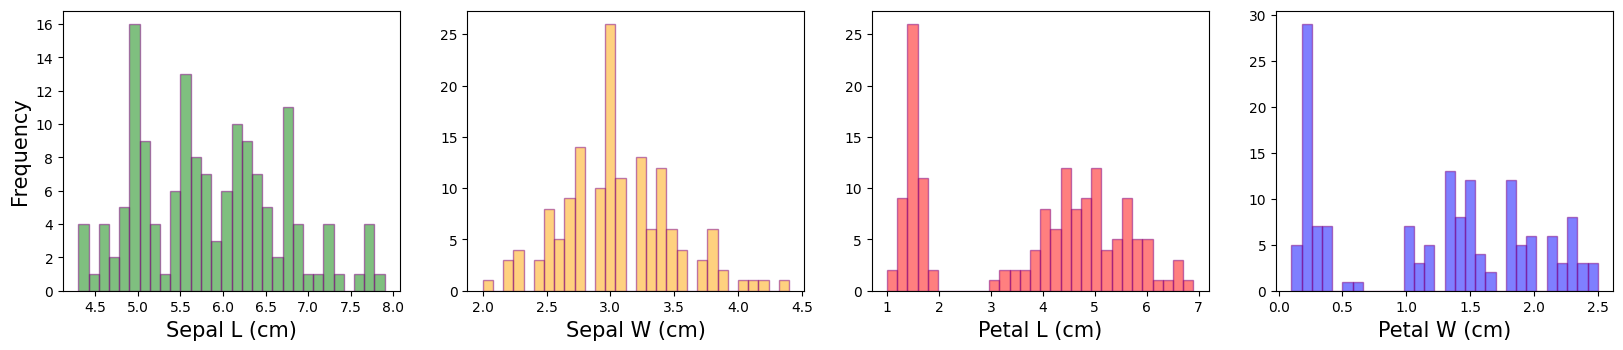

In [ ]:
plt.figure(figsize=(20,8))

ax1 = plt.subplot(2,4,1)
ax2 = plt.subplot(2,4,2)
ax3 = plt.subplot(2,4,3)
ax4 = plt.subplot(2,4,4)

ax1.hist(sXy.sepal_length, bins=30, color='green',edgecolor='purple', alpha=0.5)
ax1.set_xlabel('Sepal L (cm)', size=15)
ax1.set_ylabel('Frequency', size=15)

ax2.hist(sXy.sepal_width, bins=30, color='orange',edgecolor='purple', alpha=0.5)
ax2.set_xlabel('Sepal W (cm)', size=15)

ax3.hist(sXy.petal_length, bins=30, color='red',edgecolor='purple', alpha=0.5)
ax3.set_xlabel('Petal L (cm)', size=15)

ax4.hist(sXy.petal_width, bins=30, color='blue',edgecolor='purple', alpha=0.5)
ax4.set_xlabel('Petal W (cm)', size=15);

Text(0, 0.5, 'Frequency')

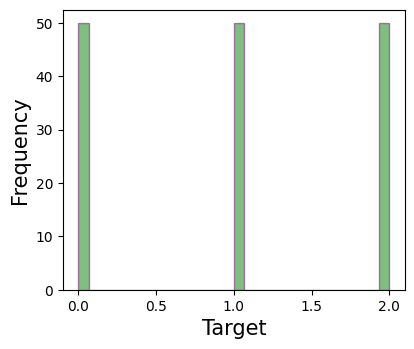

In [ ]:
plt.figure(figsize=(15,8))

ax1 = plt.subplot(2,3,1)

ax1.hist(sXy.target, bins=30, color='green',edgecolor='purple', alpha=0.5)
ax1.set_xlabel('Target', size=15)
ax1.set_ylabel('Frequency', size=15)

### Ejercicio 5

5.1 Separa el conjunto de datos en los conjuntos de entrenamiento (90%) y de prueba (10%). Muestra cuántas muestras tiene cada conjunto

5.2 Separa las variables independientes de las variables dependientes para el conjunto de prueba y el conjunto de entrenamiento. Revisa las dimensiones de cada conjunto

5.3 Normaliza los datos de entrenamiento y prueba (solo normaliza a las variables independientes)


In [ ]:
test_ratio = 0.1

train_ratio = int((1.0-test_ratio)*len(sXy.values[:,:]))

sXy_train = sXy.iloc[0:train_ratio,:]
sXy_test  = sXy.iloc[train_ratio:,:]

print(sXy_train.shape)
print(sXy_test.shape)

(135, 5)
(15, 5)


In [ ]:
train_x = (sXy_train.drop('target', axis=1) - sXy_train.drop('target', axis=1).mean())/ sXy_train.drop('target', axis=1).std()
train_y = sXy_train['target']
test_x = (sXy_test.drop('target', axis=1) - sXy_test.drop('target', axis=1).mean())/ sXy_test.drop('target', axis=1).std()
test_y = sXy_test['target']

print(train_x.shape, train_y.shape, test_x.shape, test_y.shape)

(135, 4) (135,) (15, 4) (15,)


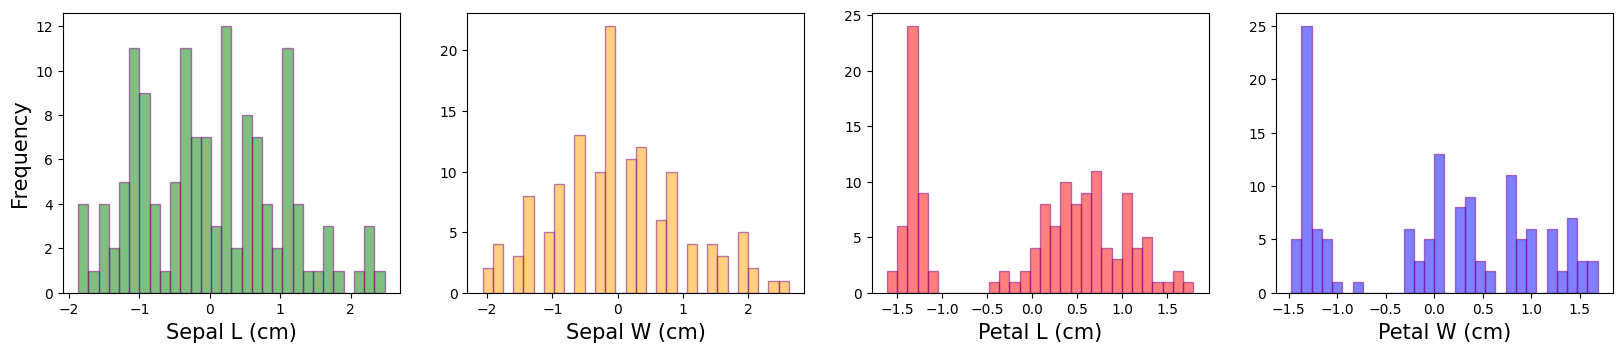

In [ ]:
plt.figure(figsize=(20,8))

ax1 = plt.subplot(2,4,1)
ax2 = plt.subplot(2,4,2)
ax3 = plt.subplot(2,4,3)
ax4 = plt.subplot(2,4,4)

ax1.hist(train_x.sepal_length, bins=30, color='green',edgecolor='purple', alpha=0.5)
ax1.set_xlabel('Sepal L (cm)', size=15)
ax1.set_ylabel('Frequency', size=15)

ax2.hist(train_x.sepal_width, bins=30, color='orange',edgecolor='purple', alpha=0.5)
ax2.set_xlabel('Sepal W (cm)', size=15)

ax3.hist(train_x.petal_length, bins=30, color='red',edgecolor='purple', alpha=0.5)
ax3.set_xlabel('Petal L (cm)', size=15)

ax4.hist(train_x.petal_width, bins=30, color='blue',edgecolor='purple', alpha=0.5)
ax4.set_xlabel('Petal W (cm)', size=15);

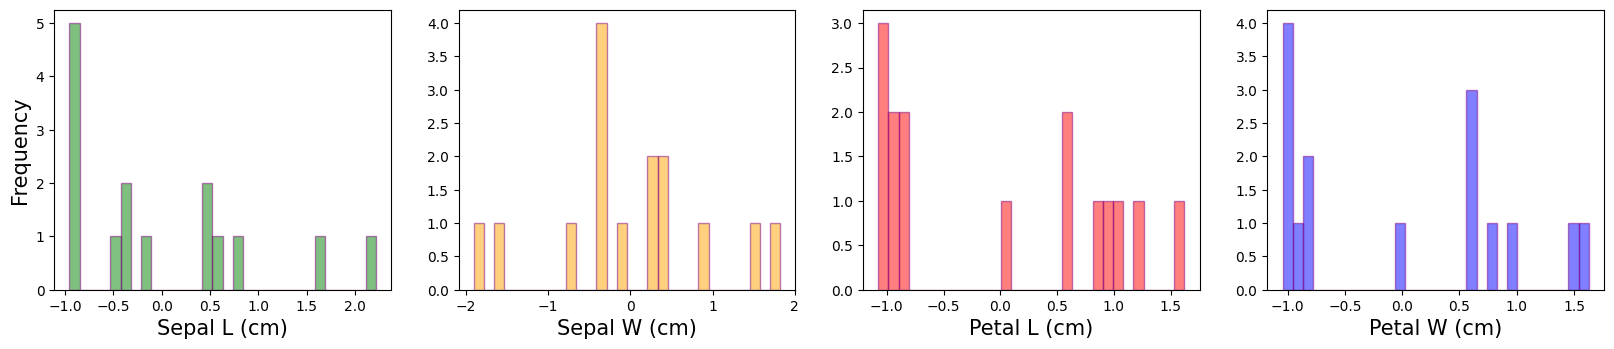

In [ ]:
plt.figure(figsize=(20,8))

ax1 = plt.subplot(2,4,1)
ax2 = plt.subplot(2,4,2)
ax3 = plt.subplot(2,4,3)
ax4 = plt.subplot(2,4,4)

ax1.hist(test_x.sepal_length, bins=30, color='green',edgecolor='purple', alpha=0.5)
ax1.set_xlabel('Sepal L (cm)', size=15)
ax1.set_ylabel('Frequency', size=15)

ax2.hist(test_x.sepal_width, bins=30, color='orange',edgecolor='purple', alpha=0.5)
ax2.set_xlabel('Sepal W (cm)', size=15)

ax3.hist(test_x.petal_length, bins=30, color='red',edgecolor='purple', alpha=0.5)
ax3.set_xlabel('Petal L (cm)', size=15)

ax4.hist(test_x.petal_width, bins=30, color='blue',edgecolor='purple', alpha=0.5)
ax4.set_xlabel('Petal W (cm)', size=15);

## II. Implementación de la red neuronal

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.layers import Activation
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
from tensorflow.keras import initializers
import time
np.random.seed(1)

### Ejercicio 7

Implementa una red neuronal con dos capas ocultas. Completa la función **architecture** que define la arquitectura.

Cúantos nodos debe tener la capa de entrada?

Cuántos valores posibles puede tomar la variable **target**? Esto define el número de clases que tienes, y por lo tanto, el número de nodos en la capa de salida

En este caso vamos a realizar una clasificación (veremos a detalle esto en las siguientes clases) porque tenemos un target categorico, por lo que la última capa debe tener tantos nodos como salidas o clases.

Nota: si crees que el modelo funciona mejor con más o menos capas, modifica la función para agregar las capas que desees.

In [ ]:
def architecture(n_hidden1, n_hidden2, initializer, activation, input_shape, classes):

    model = Sequential()

    model.add(Dense(units=n_hidden1,                # units da el número de nodos
                    kernel_initializer=initializer, # Initiallizacion de los pesos W
                    bias_initializer='zeros',       # Inicialización del bias
                    activation=activation,          # Función de activación
                    input_shape=input_shape))       # Da el numero de nodos de la capa de entrada.
                                                    # Este número corresponde al número de rasgos X que definen
                                                    # al sistema de estudio

    model.add(Dense(units=n_hidden2,
                    kernel_initializer=initializer,
                    bias_initializer='zeros',
                    activation = activation))

    model.add(Dense(units=classes ,
                    kernel_initializer=initializer,
                    bias_initializer='zeros',
                    activation = 'softmax'))

    return model

### Ejercicio 8

8.1 Llama a la función architecture para definir el modelo que vas a entrenar

8.2 Utiliza el metodo plot_model para visualizar un diagrama del modelo que definiste

8.3 Cuántos parametros (w y b) tiene el modelo que definiste (puedes calcularlo a mano o utilizar el método summary)

/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer RandomUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


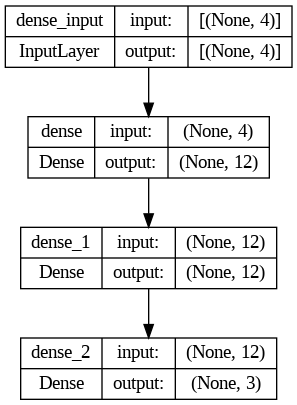

In [ ]:
n_hidden1 = 12
n_hidden2 = 12
initializer = tf.keras.initializers.RandomUniform(minval=0., maxval=0.1)
activation = 'sigmoid'
input_shape = (4,)
classes = 3

model_keras = architecture(n_hidden1, n_hidden2, initializer, activation, input_shape, classes)

plot_model(model_keras, show_shapes=True, rankdir='TB', expand_nested=True, show_layer_names=True, dpi=96)

In [ ]:
model_keras.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                60        
                                                                 
 dense_1 (Dense)             (None, 12)                156       
                                                                 
 dense_2 (Dense)             (None, 3)                 39        
                                                                 
Total params: 255 (1020.00 Byte)
Trainable params: 255 (1020.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Ejercicio 9

9.1 Compila el modelo que definiste utilizando la función de costo y [métrica](https://keras.io/api/metrics/probabilistic_metrics/) [SparseCategoricalCrossentropy](https://keras.io/api/losses/probabilistic_losses/)

Para el optimizador puedes probar algunos de los que se indican [aquí](https://keras.io/api/optimizers/), quedate con el que te dé mejor resultados.

In [ ]:
lr = 0.01

optimizer = keras.optimizers.Adam(learning_rate=lr,beta_1=0.9, beta_2=0.999, amsgrad=False)
loss = tf.keras.losses.SparseCategoricalCrossentropy()
acc = 'accuracy'

model_keras.compile(loss=loss,
              optimizer=optimizer,
              metrics=[acc])

### Ejercicio 10

9.1 Entrena el modelo utilizando el método fit()

9.2 Grafica el costo de entrenamiento y de validación con respecto a la época.

9.2 Grafica el accuracy de entrenamiento y de validación con respecto a la época.

Hint: revisa la salida del entrenamiento *history_model.history*

In [ ]:
epochs = 200
start_time = time.time()
val_split=0.1

history_model = model_keras.fit(train_x, train_y,
                          epochs=epochs,
                          batch_size=32,
                          validation_split=val_split,
                          shuffle=True,
                          verbose=2)

end_time = time.time()
print("Time for training: {:10.4f}s".format(end_time - start_time))

Epoch 1/200
4/4 - 2s - loss: 1.1060 - accuracy: 0.3388 - val_loss: 1.1102 - val_accuracy: 0.2857 - 2s/epoch - 498ms/step
Epoch 2/200
4/4 - 0s - loss: 1.1016 - accuracy: 0.3388 - val_loss: 1.1217 - val_accuracy: 0.2857 - 82ms/epoch - 20ms/step
Epoch 3/200
4/4 - 0s - loss: 1.0972 - accuracy: 0.3554 - val_loss: 1.1187 - val_accuracy: 0.2857 - 97ms/epoch - 24ms/step
Epoch 4/200
4/4 - 0s - loss: 1.0932 - accuracy: 0.3554 - val_loss: 1.1123 - val_accuracy: 0.2857 - 101ms/epoch - 25ms/step
Epoch 5/200
4/4 - 0s - loss: 1.0890 - accuracy: 0.3554 - val_loss: 1.1014 - val_accuracy: 0.2857 - 84ms/epoch - 21ms/step
Epoch 6/200
4/4 - 0s - loss: 1.0799 - accuracy: 0.3554 - val_loss: 1.0901 - val_accuracy: 0.5714 - 113ms/epoch - 28ms/step
Epoch 7/200
4/4 - 0s - loss: 1.0680 - accuracy: 0.4215 - val_loss: 1.0732 - val_accuracy: 0.2857 - 83ms/epoch - 21ms/step
Epoch 8/200
4/4 - 0s - loss: 1.0495 - accuracy: 0.3388 - val_loss: 1.0513 - val_accuracy: 0.2857 - 96ms/epoch - 24ms/step
Epoch 9/200
4/4 - 0s - 

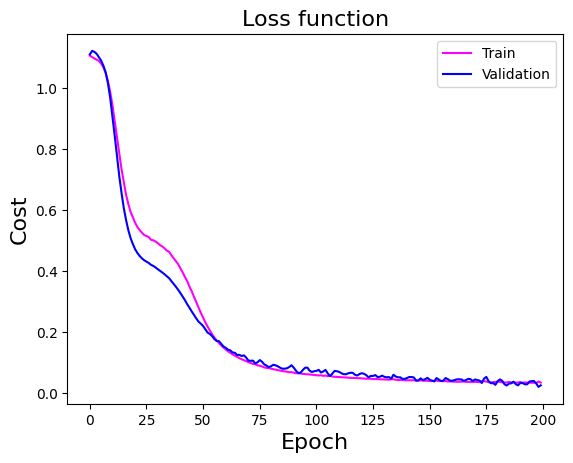

In [ ]:
plt.plot(history_model.history['loss'], 'magenta')
plt.plot(history_model.history['val_loss'], 'blue')
plt.title('Loss function', size=16)
plt.ylabel('Cost', size=16)
plt.xlabel('Epoch', size=16)
plt.legend(['Train', 'Validation'], loc='upper right');

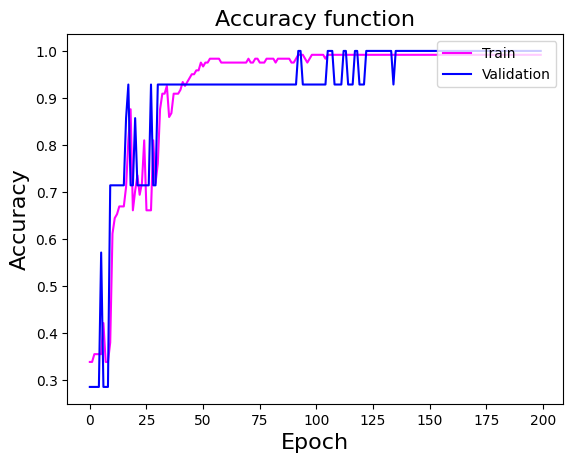

In [ ]:
plt.plot(history_model.history['accuracy'], 'magenta')
plt.plot(history_model.history['val_accuracy'], 'blue')
plt.title('Accuracy function', size=16)
plt.ylabel('Accuracy', size=16)
plt.xlabel('Epoch', size=16)
plt.legend(['Train', 'Validation'], loc='upper right');

### Ejercicio 11

Evalúa tu modelo utilizando los datos de prueba y el método evaluate()

In [ ]:
scores = model_keras.evaluate(test_x, test_y)
print('Test loss:', scores[0])

1/1 [==============================] - 0s 34ms/step - loss: 0.2252 - accuracy: 0.9333
Test loss: 0.22515231370925903
